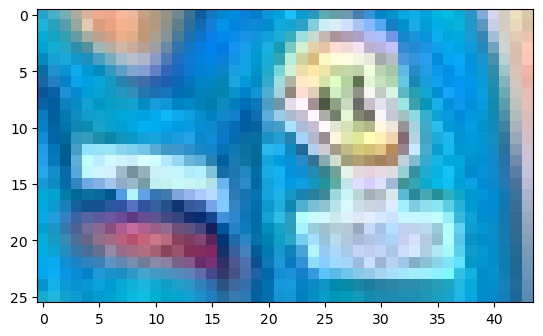

In [9]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import clustering_algorithms

# Load an image:
image_path = 'pic2.jpg'
image = Image.open(image_path)
pixels = image.load()
width, height = image.size

# Display image in notebook:
%matplotlib inline
imshow(np.asarray(image))

In [10]:
# Turn image into list of vectors (1 vector / pixel):
vector_list = []
for x in range(width):
    for y in range(height):
        current_point = []
        current_point.append(pixels[x, y][0])
        current_point.append(pixels[x, y][1])
        current_point.append(pixels[x, y][2])

        current_vector = np.array(current_point)
        vector_list.append(current_vector)

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(width, height, len(vector_list)))

Image file with dimensions 44x26 pixels turned into 1144 vectors.


In [11]:
# Perform clustering on the vectors:
dbscan_clusters = clustering_algorithms.dbscan(vector_list, minpts=5, epsilon=50)
kmeans_clusters = clustering_algorithms.kmeans(vector_list, 4)

430
443
468
548
539
552
590
571
557
495
571
436
445
481
504
440
411
436
440
524
476
161
543
523
471
535
604
576
600
587
473
542
563
603
578
515
476
475
456
389
406
517
512
564
550
608
577
589
386
336
405
607
585
549
544
534
573
567
486
508
537
554
587
583
559
256
440
339
598
581
552
554
608
517
486
503
523
549
581
423
529
552
549
534
235
548
491
502
522
523
532
611
345
580
517
512
532
581
548
526
497
510
578
601
506
483
595
582
529
445
491
576
188
609
470
413
315
566
539
460
468
556
549
453
365
527
554
478
407
528
246
417
311
558
423
423
530
340
282
495
413
514
569
396
468
567
323
231
529
468
366
527
484
506
558
385
549
478
523
547
534
540
536
544
546
582
588
527
542
529
520
527
527
527
563
568
568
602
491
607
518
576
552
520
530
527
531
527
520
577
587
594
571
586
535
524
536
567
574
556
537
586
597
534
340
537
530
568
593
588
557
527
566
519
583
532
563
531
517
451
419
544
580
335
563
577
593
557
531
509
520
527
601
573
527
544
596
271
471
520
587
578
542
510
524
537
581
527
557
537


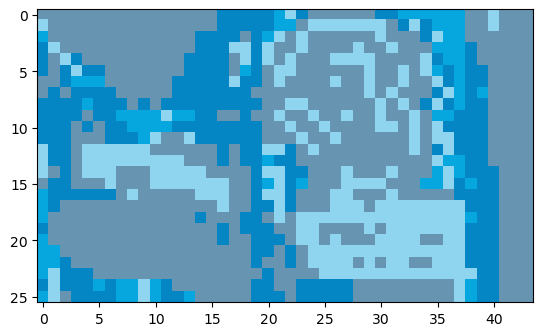

In [12]:
# Convert the clusters back into an image:
# This code assumes that the result is a list that
# is as long as the list of points and contains the 
# cluster number for each point with the corresponding
# position in the list.
# E. g. [1, 4, 2, 1, 1, 4, 2, 2, 3, ...])
def clusters_to_image(cluster_per_point_list: list, points: list, width, height):
    assert(len(cluster_per_point_list) == len(points))

    cluster_count = max(cluster_per_point_list) + 1
    inverted_clusters = [[] for _ in range(cluster_count)]

    for i in range(len(cluster_per_point_list)):
        inverted_clusters[cluster_per_point_list[i]].append(points[i])

    mean_colors = [np.array([0, 0, 0]) for _ in range(cluster_count)]
    counter =  [0 for _ in range(cluster_count)]
    for i in range(cluster_count):
        for elem in inverted_clusters[i]:
            mean_colors[i] = np.add(mean_colors[i], elem)
            counter[i] += 1

        mean_colors[i] = np.divide(mean_colors[i], np.array([counter[i], counter[i], counter[i]]))

    clustered_image = Image.new('RGB', (width, height))
    pix = clustered_image.load()
    for x in range(width):
        for y in range(height):
            cl_id = cluster_per_point_list[y + x * height]
            if cl_id == -1:
                pix[x, y] = (0, 0, 0)
            else:
                curr_pixel = [int(x) for x in mean_colors[cl_id]]
                pix[x, y] = tuple(curr_pixel)

    return clustered_image

clustered_image = clusters_to_image(
    kmeans_clusters, vector_list, width, height)
clustered_image2 = clusters_to_image(
    dbscan_clusters, vector_list, width, height)
# Display the clustered image:
%matplotlib inline
imshow(np.asarray(clustered_image))